# Do Corporate Tax Cuts Create Jobs? - A Regression Analysis 

### Taniya Adhikari

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import statistics

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

import scipy

#### Data Importing and Cleaning

It was harder to find historical dataset for all the indicators, therefore, I had download them seperately and merge them. Here is the link for the Dataset [OECD DATA](https://data.oecd.org/)

In [13]:
# check for missing value and dropping missing variables
def percentMissing(df):
    
    df_numeric = df.select_dtypes(include=[np.number])
    numeric_cols = df_numeric.columns.values
    print(numeric_cols)
    
    # % of missing data
    for col in df.columns:
        # create missing indicator for features with missing data
        missing = df[col].isnull()
        pct_missing = np.mean(missing)*100
        print('{} - {}%'.format(col, round(pct_missing)))
        num_missing = np.sum(missing)
    
        if num_missing > 0:  
            df['{}_ismissing'.format(col)] = missing
        
    ismissing_cols = [col for col in df.columns if 'ismissing' in col]
    df['num_missing'] = df[ismissing_cols].sum(axis=1)
    
    # dropping row with at least one missing feature
    ind_missing = df[df['num_missing']>1].index
    clean_df = df.drop(ind_missing, axis=0)
    
    return clean_df



In [14]:
# subsetting data for only two country
def subsetdata(df):
    
    # filtering for yearly value
    df_filtered = df[df['FREQUENCY'] =='A']
    df_filtered['TIME'] = pd.to_numeric(df_filtered['TIME'])
    
    # selecting colums only for Location, Time, and value
    df1 = df_filtered[['LOCATION', 'TIME', 'Value']]
    
    # subsetting dataset for only US & JAP from year 1975 - 2017
    #usa = df1[df1.TIME >=1975]
    #jpn = df1[(df1.LOCATION == 'JPN') & (df1.TIME >=1975)]
    #df2 = pd.concat([usa, jpn])

    
    df3 = percentMissing(df1)
    
    df4 = df3[['LOCATION', 'TIME', 'Value']]
    
    # droppong values because I need only data till 2017
    df5 = df4[df4['TIME'] < 2018]
    
    index = df5.index
    number_of_rows = len(index)
    print("total_rows: {}". format(number_of_rows))
            
    return df5

In [15]:
# checking data type
def Datatype(df):
    # shape and data types of the data
    print(df.shape)
    print(df.dtypes)

    # select numeric columns
    df_numeric = df.select_dtypes(include=[np.number])
    numeric_cols = df_numeric.columns.values
    print(numeric_cols)

    # select non numeric columns
    df_non_numeric = df.select_dtypes(exclude=[np.number])
    non_numeric_cols = df_non_numeric.columns.values
    print(non_numeric_cols)

In [16]:
def DataImporting():
    # read the data

    corp_tax_df = pd.read_csv('Corporate TAX.csv')
    interest_df = pd.read_csv('long-term interest rates.csv')
    uemp_df = pd.read_csv('UnemploymentRate.csv')
    income_tax_df = pd.read_csv('Tax_Personal_Income.csv')
    GDP_df = pd.read_csv('GDP.csv')
    CPI_df = pd.read_csv('CPI.csv')
    
    #renaming columns
    corp_tax = subsetdata(corp_tax_df)
    corp_tax = corp_tax.rename(columns={'Value': 'Corporate_Tax'})
    
    interest = subsetdata(interest_df)
    interest = interest.rename(columns={'Value': 'Interest_Rates'})
    
    uemp = subsetdata(uemp_df)
    uemp = uemp.rename(columns={'Value': 'Unemployment_Rates'})
    
    income_tax = subsetdata(income_tax_df)
    income_tax = income_tax.rename(columns={'Value': 'Income_Tax'})
    
    GDP = subsetdata(GDP_df)
    GDP = GDP.rename(columns={'Value': 'GDP'})
    
    CPI = subsetdata(CPI_df)
    CPI = CPI.rename(columns={'Value': 'CPI'})
    
    # merging the data
    merged_data = pd.merge(corp_tax, interest, how='left', on=['LOCATION', 'TIME']).merge(uemp).merge(income_tax).merge(GDP).merge(CPI)
    merged_data = merged_data.fillna(0)
                     
    return merged_data


In [17]:
econ_df = DataImporting()
econ_df

['TIME' 'Value']
LOCATION - 0%
TIME - 0%
Value - 0%
total_rows: 1596
['TIME' 'Value']
LOCATION - 0%
TIME - 0%
Value - 0%
total_rows: 1304
['TIME' 'Value']
LOCATION - 0%
TIME - 0%
Value - 0%
total_rows: 1251
['TIME' 'Value']
LOCATION - 0%
TIME - 0%
Value - 0%
total_rows: 1596
['TIME' 'Value']
LOCATION - 0%
TIME - 0%
Value - 0%
total_rows: 2190
['TIME' 'Value']
LOCATION - 0%
TIME - 0%
Value - 0%
total_rows: 2250


,LOCATION,TIME,Corporate_Tax,Interest_Rates,Unemployment_Rates,Income_Tax,GDP,CPI
0,AUS,1967,36.493,0.000000,1.875000,36.493,3442.171342,3.478261
1,AUS,1968,35.685,0.000000,1.850000,35.685,3827.600452,2.521008
2,AUS,1969,37.413,0.000000,1.800000,37.413,4201.742990,3.278688
3,AUS,1970,37.327,6.646667,1.625000,37.327,4638.882122,3.439153
4,AUS,1971,38.735,6.713333,1.925000,38.735,4849.898734,6.138107
...,...,...,...,...,...,...,...,...
1043,LTU,2013,13.233,3.831667,11.800000,13.233,26721.579810,1.047479
1044,LTU,2014,13.166,2.792500,10.725000,13.166,28184.349130,0.103758
1045,LTU,2015,13.297,1.380833,9.133333,13.297,28842.242750,-0.884097
1046,LTU,2016,13.404,0.898333,7.900000,13.404,30922.107210,0.905525


In [30]:
econ_df.to_csv('All_Indicators.csv')

In [18]:
# assigning to variables
corptax = np.floor(econ_df.Corporate_Tax)
IR = np.floor(econ_df.Interest_Rates)
unempR = np.floor(econ_df.Unemployment_Rates)
inctax = np.floor(econ_df.Income_Tax)
gdp = np.floor(econ_df.GDP)
cpi = np.floor(econ_df.CPI)

#### Corporate Tax Histogram

In [25]:
def plot(x, xlabel, title):
    
    plt.rcParams['figure.figsize'] = [10,6]
    fig, ax = plt.subplots()
    sns.set_style("white")
    sns.histplot(data=econ_df, x=x, bins=30)
    plt.suptitle(title, size=20, x=0.08, y=.95,horizontalalignment='left', verticalalignment='top')

    plt.ylabel('Count', size=16)
    plt.xlabel(xlabel, size=16)

    plt.legend(fontsize=15)

    sns.despine()

    plt.show()

No handles with labels found to put in legend.


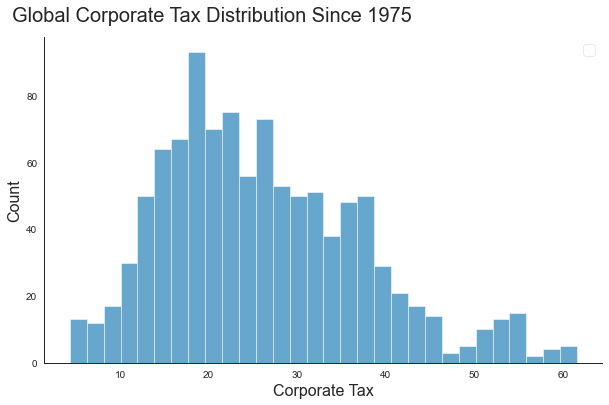

In [27]:
plot('Corporate_Tax', 'Corporate Tax', "Global Corporate Tax Distribution Since 1975")

#### Interest Rates Histogram

No handles with labels found to put in legend.


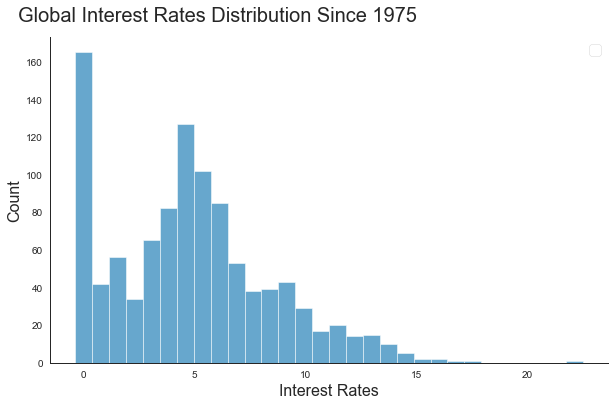

In [28]:
plot('Interest_Rates', 'Interest Rates', "Global Interest Rates Distribution Since 1975")

#### Unemployment Rates Histogram

No handles with labels found to put in legend.


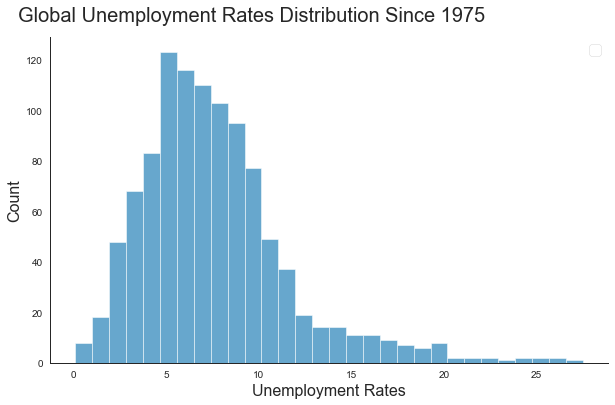

In [29]:
plot('Unemployment_Rates', 'Unemployment Rates', "Global Unemployment Rates Distribution Since 1975")

#### Income Tax Rates Histogram

No handles with labels found to put in legend.


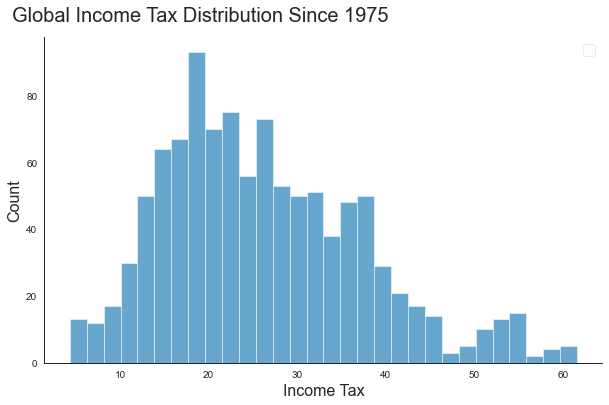

In [31]:
plot('Income_Tax', 'Income Tax', "Global Income Tax Distribution Since 1975")

#### GDP Histogram

No handles with labels found to put in legend.


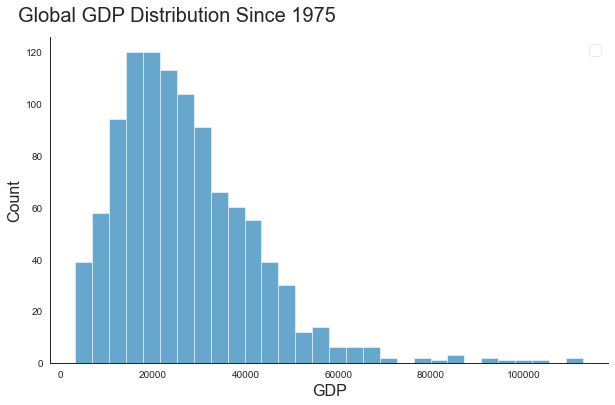

In [32]:
plot('GDP', 'GDP', "Global GDP Distribution Since 1975")

#### CPI Histogram

No handles with labels found to put in legend.


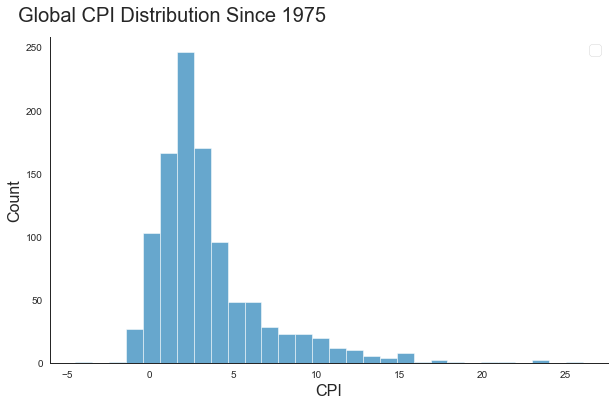

In [33]:
plot('CPI', 'CPI', "Global CPI Distribution Since 1975")

In [34]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [35]:
def SummaryStatistics(group1, group2):
    mean1 = group1.mean()
    median1= group1.median()
    mode1 = statistics.mode(group1)
    var1 = group1.var()
    std1 = group1.std()
    
    mean2 = group2.mean()
    median2= group2.median()
    mode2 = statistics.mode(group2)
    var2 = group2.var()
    std2 = group2.std()
    
    CEF = CohenEffectSize(group1, group2)
    
    print("Mean of {}: {}".format("group1", mean1))
    print("Median of {}: {}".format("group1", median1))
    print("Mode of {}: {}".format("group1", mode1))
    print("Variance of {}: {}".format("group1", var1))
    print("Standard Deviation of {}: {}\n".format("group1", std1))
    
    
    print("Mean of {}: {}".format("group2", mean2))
    print("Median of {}: {}".format("group2", median2))
    print("Mode of {}: {}".format("group2", mode2))
    print("Variance of {}: {}".format("group2", var2))
    print("Standard Deviation of {}: {}\n".format("group2", std2))
    
    print("Cohen Effect Size: {}".format(CEF))
    

#### Scatter Plots

Scatter plot of Corporate Tax rate vs. Uemployment rates

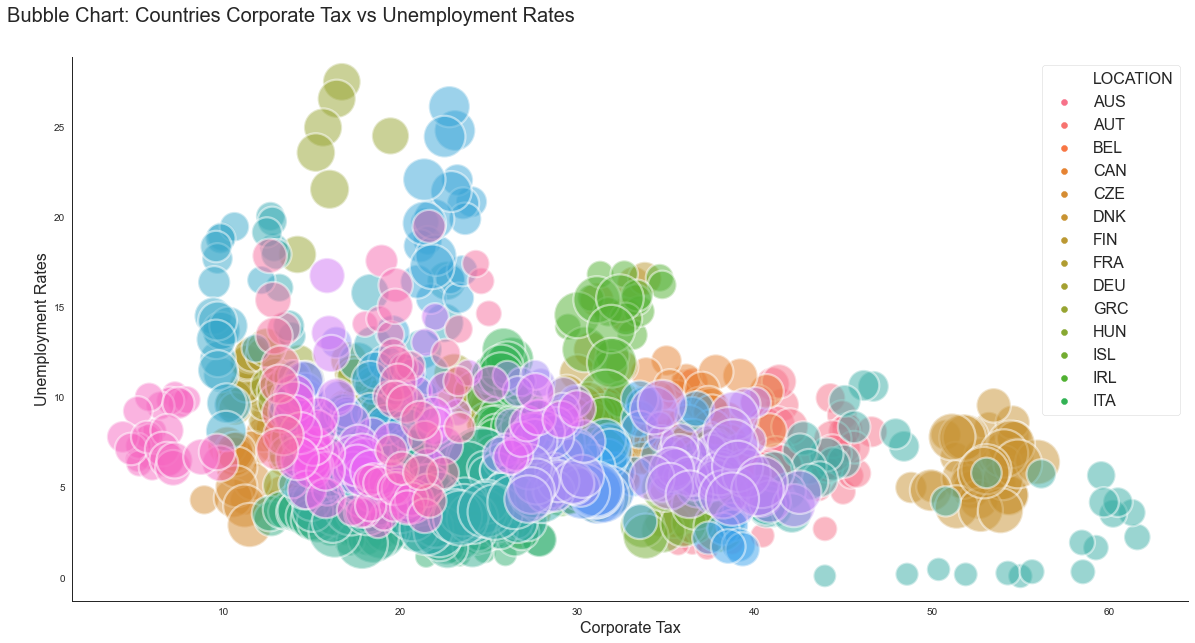

In [46]:
plt.rcParams['figure.figsize'] = [20,10]
fig, ax = plt.subplots()

g = sns.scatterplot(x="Corporate_Tax", y="Unemployment_Rates",
                    size="GDP", sizes=(500,5000), 
                    alpha=0.5, hue="LOCATION", data=econ_df)

h,l = g.get_legend_handles_labels()
plt.legend(h[0:15],l[0:15], fontsize=16)

plt.suptitle("Bubble Chart: Countries Corporate Tax vs Unemployment Rates", 
             size=20, x=0.08, y=.95,horizontalalignment='left', verticalalignment='top')


plt.ylabel('Unemployment Rates', size=16)
plt.xlabel('Corporate Tax', size=16)

sns.despine()
plt.show(g)

Scatter plot of Corporate Tax rate vs. CPI Index

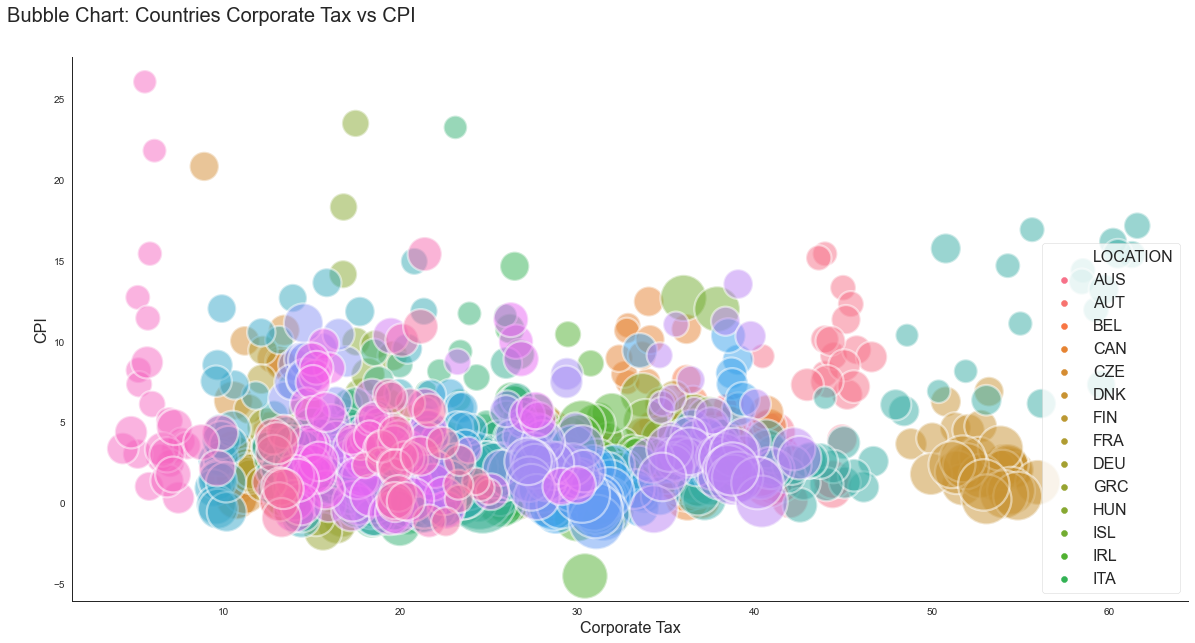

In [47]:
plt.rcParams['figure.figsize'] = [20,10]
fig, ax = plt.subplots()

g = sns.scatterplot(x="Corporate_Tax", y="CPI",
                    size="GDP", sizes=(500,5000), 
                    alpha=0.5, hue="LOCATION", data=econ_df)

h,l = g.get_legend_handles_labels()
plt.legend(h[0:15],l[0:15], fontsize=16)

plt.suptitle("Bubble Chart: Countries Corporate Tax vs CPI", 
             size=20, x=0.08, y=.95,horizontalalignment='left', verticalalignment='top')


plt.ylabel('CPI', size=16)
plt.xlabel('Corporate Tax', size=16)

sns.despine()
plt.show(g)

#### Correlation

In [48]:
# Caculates Covariance
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [50]:
# calculating pearsonr usign scripy.stats. It gives two sided value, but we will need only first.
CorpTax, UempRate = econ_df.Corporate_Tax, econ_df.Unemployment_Rates
corr, _ = scipy.stats.pearsonr(CorpTax, UempRate)
spcorr, _ = scipy.stats.spearmanr(CorpTax, UempRate)

print('Pearson correlation for Global Corporate tax vs. Unemployment: %.3f' % corr)
print('Spearmans correlation for Global Corporate tax vs. Unemployment: %.3f' % spcorr)
print("Covariance of Global Corp Tax vs Unemployment rates: {}". format(Cov(CorpTax, UempRate)))

Pearson correlation for Global Corporate tax vs. Unemployment: -0.220
Spearmans correlation for Global Corporate tax vs. Unemployment: -0.183
Covariance of Global Corp Tax vs Unemployment rates: -10.078110072908922


Testing for Mean difference between both company's unemployment rate. Since Japan Corporate Tax is much lower than USA COrporate tax.

In [302]:
class DiffMeansPermute(thinkstats2.HypothesisTest):
    
    # calculates the absolute difference in mean for both groups
    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat
    
    # combines the two groups into one
    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    # simulates the null hypothesis
    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [303]:
# Test: compare mean unemployment rates
# H_0: There is no difference between the mean unemployment rates between the USA and JPN
# H_1: There is a difference in means.    
data1 = usa.Unemployment_Rates.values, jpn.Unemployment_Rates.values
dt1 = DiffMeansPermute(data1)
pvalue1 = dt1.PValue(iters=1000)
print("Test 1: Difference in mean Unemployment rates for USA and JPN. The p-value is {}".format(pvalue1))

Test 1: Difference in mean Unemployment rates for USA and JPN. The p-value is 0.0


We reject the null hypothesis because p-value is less than .05

#### Regression Analysis for Variables

In [53]:
from thinkstats2 import Mean, MeanVar, Var, Std, Cov

# calculates slope and intercepttof the relationship
def LeastSquares(xs, ys):
    meanx, varx = MeanVar(xs)
    meany = Mean(ys)

    # calculates covariance of x & y and then divide it by x variance.
    # slope of the linear fit
    slope = Cov(xs, ys, meanx, meany) / varx
    
    # intercept of the linear fit
    inter = meany - slope * meanx

    return inter, slope


# returns the difference between actual values and fitted lines
def Residuals(xs, ys, inter, slope):
    xs = np.asarray(xs)
    ys = np.asarray(ys)   # observed values
    yhat = inter + slope * xs   # expected values
    res = ys - yhat
    return res

# r-squared
def CoefDetermination(ys, res):
    return 1 - Var(res) / Var(ys)

In [54]:
intercept, slope = LeastSquares(econ_df.Corporate_Tax, econ_df.Unemployment_Rates)
intercept, slope

(9.685724946590412, -0.07915718583772648)

In [55]:
residuals = Residuals(econ_df.Corporate_Tax, econ_df.Unemployment_Rates, intercept, slope)
econ_df['residual'] = residuals
# Pearson Correlation
corr, _ = scipy.stats.pearsonr(econ_df.Corporate_Tax, econ_df.Unemployment_Rates)
print('Pearsons correlation: %.3f' % corr)
print('Pearsons p^2: %.3f' % corr**2)


Pearsons correlation: -0.220
Pearsons p^2: 0.048


<AxesSubplot:xlabel='Corporate_Tax', ylabel='residual'>

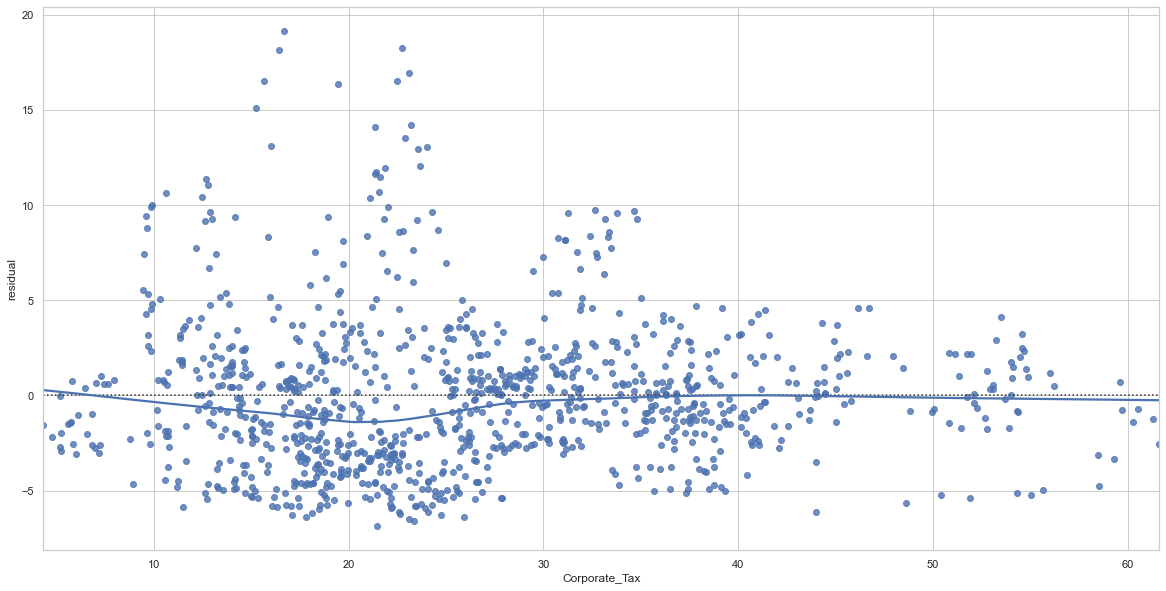

In [57]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Make an example dataset with y ~ x
rs = np.random.RandomState(7)
x = rs.normal(2, 1, 75)
y = 2 + 1.5 * x + rs.normal(0, 2, 75)

# Plot the residuals after fitting a linear model
sns.residplot(x=econ_df.Corporate_Tax, y=econ_df.residual, lowess=True, color="b")

Based on the analysis both residual plots have pattern, so it violates the assumption of homoscedasticity. Therefore, pearson r is not the best model for this data. However, they do show non-linear relationship therefore, spearman test is a better Model for this.

Initially, the Question was Do tax cuts create jobs? This statement implies that as taxes gets lower, so does the unemployment rate. Unemployment rate is one indicator to measure jobs created, We should’ve seen some positive relationship. Though, there is a relationship between the two variables, it is negative and non-linear. The Covariance is also negative, stating that they both deviates in opposite direction. Therefore I conclude, taxes don’t really create jobs. Furthermore, when compared to JAPAN, who historically had lower tax rates, but had higher unemployment rates with a strong negative relationship, indicating that lower taxes causes more unemployment
